#Librerias

In [66]:
import os

# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from scipy.optimize import fmin_tnc
import pandas as pd

# modulo para cargar archivos en formato MATLAB
# from scipy.io import loadmat

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

#creacion del data set, con nuevas colunmas y duplicando los datos <br>
feedback: Relacionado con la satisfaccion<br>
special_assistance:Relacionado con la edad<br>
passenger_group:relacionado con la distancia<br>
#Se Agregan 25000 datos para duplicar los originalas

In [67]:
data = np.genfromtxt('test.csv', delimiter=',', dtype=str, skip_header=1)
# Número de filas actuales
num_filas_actuales = data.shape[0]

# Generar 10,000 nuevas filas con valores aleatorios dentro de rangos coherentes
num_nuevas_filas = 25000

# Generar nuevos números para la columna '#' (contador de filas)
contador_filas = np.arange(num_filas_actuales + 1, num_filas_actuales + num_nuevas_filas + 1)

# Generar nuevos IDs secuenciales a partir del último ID
nuevos_ids = np.arange(num_filas_actuales + 1, num_filas_actuales + num_nuevas_filas + 1)

# 1. Generar 'Gender' aleatorio (0 para Male, 1 para Female)
genders = np.random.choice(['Male', 'Female'], size=num_nuevas_filas)

# 2. Generar 'Customer Type' aleatorio
customer_types = np.random.choice(['Loyal Customer', 'Disloyal Customer'], size=num_nuevas_filas)

# 3. Generar edades razonables (entre 18 y 80 años)
ages = np.random.randint(18, 81, size=num_nuevas_filas)

# 4. Generar 'Type of Travel'
types_of_travel = np.random.choice(['Business travel', 'Personal Travel'], size=num_nuevas_filas)

# 5. Generar 'Class' aleatorio
classes = np.random.choice(['Business', 'Eco', 'Eco Plus'], size=num_nuevas_filas, p=[0.5, 0.4, 0.1])


# 6. Generar 'Flight Distance' (entre 100 y 5000)
flight_distances = np.random.randint(100, 5001, size=num_nuevas_filas)

# 7. Generar valores de 'satisfaction'
satisfaction = np.random.choice(['satisfied', 'neutral or dissatisfied'], size=num_nuevas_filas)

# 8. Generar otros valores numéricos para las columnas restantes
wifi_services = np.random.randint(0, 6, size=num_nuevas_filas)
arrival_time_convenience = np.random.randint(0, 6, size=num_nuevas_filas)
online_booking_ease = np.random.randint(0, 6, size=num_nuevas_filas)
gate_location = np.random.randint(0, 6, size=num_nuevas_filas)
food_and_drink = np.random.randint(0, 6, size=num_nuevas_filas)
online_boarding = np.random.randint(0, 6, size=num_nuevas_filas)
seat_comfort = np.random.randint(0, 6, size=num_nuevas_filas)
inflight_entertainment = np.random.randint(0, 6, size=num_nuevas_filas)
onboard_service = np.random.randint(0, 6, size=num_nuevas_filas)
leg_room_service = np.random.randint(0, 6, size=num_nuevas_filas)
baggage_handling = np.random.randint(0, 6, size=num_nuevas_filas)
checkin_service = np.random.randint(0, 6, size=num_nuevas_filas)
inflight_service = np.random.randint(0, 6, size=num_nuevas_filas)
cleanliness = np.random.randint(0, 6, size=num_nuevas_filas)
departure_delay = np.random.randint(0, 101, size=num_nuevas_filas)
arrival_delay = np.random.randint(0, 101, size=num_nuevas_filas)

# 9. Generar nuevas columnas de datos

# 9.1 Crear la columna 'Customer Feedback' basada en la columna 'satisfaction'
feedback = np.where(satisfaction == 'satisfied', 'Positive experience', 'Neutral or Negative experience')

# 9.2 Crear la columna 'Requested Special Assistance' basada en la columna 'Age'
special_assistance = np.where(ages > 60, 'True', 'False')

# 9.3 Crear la columna 'Passenger Group' basada en la columna 'Flight Distance'
passenger_group = np.where(flight_distances < 500, 'Short Distance', 
                           np.where(flight_distances <= 1500, 'Medium Distance', 'Long Distance'))

# Crear las nuevas filas combinando las columnas (incluyendo la columna '#')
nuevas_filas = np.column_stack((
    contador_filas,  # Columna '#'
    nuevos_ids,  # IDs
    genders,
    customer_types,
    ages,
    types_of_travel,
    classes,
    flight_distances,
    wifi_services,
    arrival_time_convenience,
    online_booking_ease,
    gate_location,
    food_and_drink,
    online_boarding,
    seat_comfort,
    inflight_entertainment,
    onboard_service,
    leg_room_service,
    baggage_handling,
    checkin_service,
    inflight_service,
    cleanliness,
    departure_delay,
    arrival_delay,
    satisfaction,
    feedback,
    special_assistance,
    passenger_group
))

# Agregar columnas vacías para las nuevas columnas en el dataset original
feedback_original = np.where(data[:, -1] == 'satisfied', 'Positive experience', 'Neutral or Negative experience')
special_assistance_original = np.where(data[:, 4].astype(int) > 60, 'True', 'False')
flight_distance_original = data[:, 7].astype(float)
passenger_group_original = np.where(flight_distance_original < 500, 'Short Distance',
                                    np.where(flight_distance_original <= 1500, 'Medium Distance', 'Long Distance'))

# Añadir estas columnas al dataset original
data_modificado = np.column_stack((data, feedback_original, special_assistance_original, passenger_group_original))

# Ahora unir el dataset original modificado con las nuevas filas
dataset_ampliado = np.vstack((data_modificado, nuevas_filas))

# Guardar el nuevo dataset en un archivo CSV llamado 'dataset_sintetico_ampliado.csv'
np.savetxt('dataset_sintetico_ampliado.csv', dataset_ampliado, delimiter=',', fmt='%s', header=",".join(
    ['#', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 
     'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 
     'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 
     'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 
     'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction', 
     'Customer Feedback', 'Requested Special Assistance', 'Passenger Group']), comments='')

print("El dataset ha sido ampliado con 10,000 filas adicionales y guardado como 'dataset_sintetico_ampliado.csv'.")


El dataset ha sido ampliado con 25,000 filas adicionales y guardado como 'dataset_sintetico_ampliado.csv'.


# Grafica comparativa

(25976, 24) (50976, 27)
['19556' 'Female' 'Loyal Customer' '52' 'Business travel' 'Eco' '160' '5'
 '4' '3' '4' '3' '4' '3' '5' '5' '5' '5' '2' '5' '5' '50' '44' 'satisfied']
['45001' 'Male' 'Loyal Customer' '19' 'Personal Travel' 'Eco Plus' '613'
 '3' '5' '1' '1' '5' '4' '2' '1' '3' '0' '2' '5' '1' '0' '51' '89'
 'satisfied' 'Positive experience' 'False' 'Medium Distance']


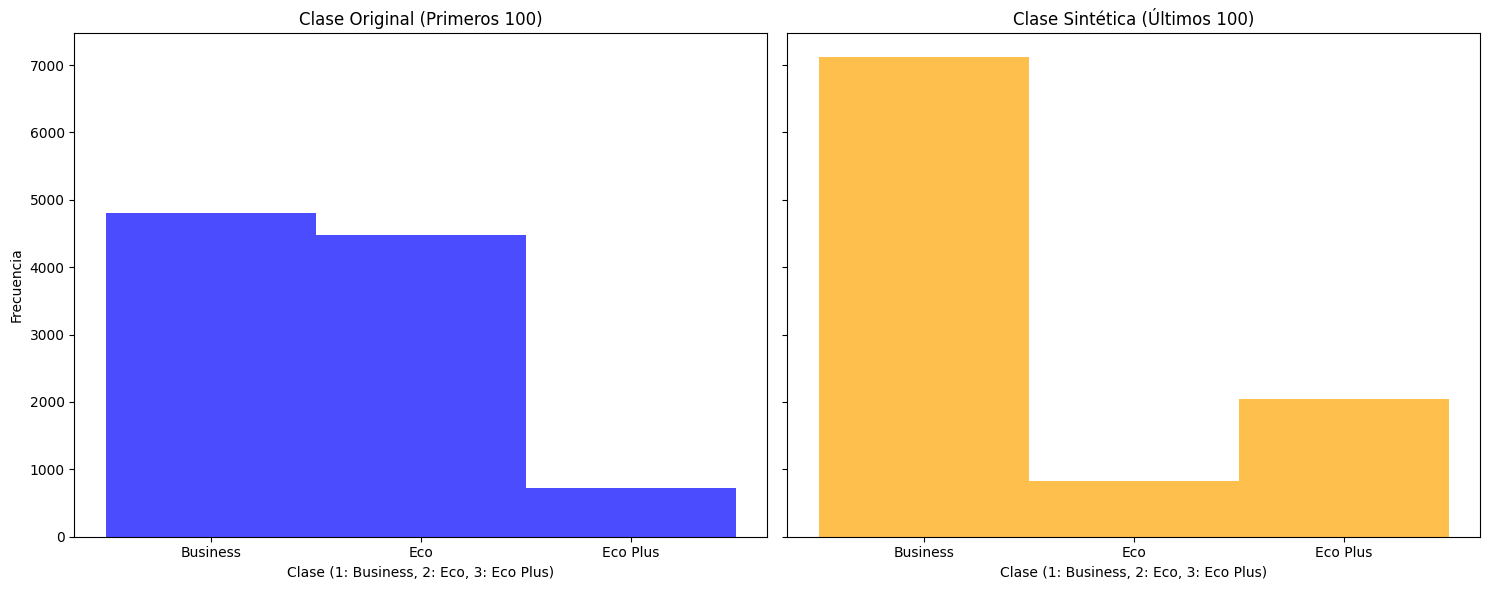

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Función para transformar la columna 'Class'
def transformar_clase(data):
    class_map = {'Business': 1, 'Eco': 2, 'Eco Plus': 3}
    # Reemplazar los valores inválidos con 'Eco' (valor predeterminado)
    data[:, 6] = np.where(np.isin(data[:, 6], list(class_map.keys())), data[:, 6], 'Eco')
    data[:, 6] = np.vectorize(class_map.get)(data[:, 5])
    return data

# Cargar el dataset original y sintético
data_original = np.genfromtxt('test.csv', delimiter=',', dtype=str, encoding=None, skip_header=1)
data_sintetico = np.genfromtxt('dataset_sintetico_ampliado.csv', delimiter=',', dtype=str, encoding=None, skip_header=1)

# Eliminar la columna de índice '#'
data_original = np.delete(data_original, 0, axis=1)
data_sintetico = np.delete(data_sintetico, 0, axis=1)
print(data_original.shape, data_sintetico.shape)
print(data_original[0])
print(data_sintetico[45000])

# Transformar la columna 'Class' en ambos datasets
data_original = transformar_clase(data_original)
data_sintetico = transformar_clase(data_sintetico)

# Seleccionar los primeros 100 datos del dataset original
muestra_original = data_original[:10000, 6].astype(int)

# Seleccionar los últimos 100 datos del dataset sintético
muestra_sintetico = data_sintetico[-10000:, 6].astype(int)

# Función para crear gráficas de comparación
def plot_side_by_side(data1, data2, title1, title2, xlabel, ylabel):
    fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

    axs[0].hist(data1, bins=np.arange(1, 5) - 0.5, alpha=0.7, color='blue')
    axs[0].set_title(title1)
    axs[0].set_xlabel(xlabel)
    axs[0].set_ylabel(ylabel)
    axs[0].set_xticks([1, 2, 3])
    axs[0].set_xticklabels(['Business', 'Eco', 'Eco Plus'])

    axs[1].hist(data2, bins=np.arange(1, 5) - 0.5, alpha=0.7, color='orange')
    axs[1].set_title(title2)
    axs[1].set_xlabel(xlabel)
    axs[1].set_xticks([1, 2, 3])
    axs[1].set_xticklabels(['Business', 'Eco', 'Eco Plus'])

    plt.tight_layout()
    plt.show()

# Graficar comparación de la columna 'Class' entre el dataset original y sintético
plot_side_by_side(muestra_original, muestra_sintetico,
                  'Clase Original (Primeros 100)', 'Clase Sintética (Últimos 100)',
                  'Clase (1: Business, 2: Eco, 3: Eco Plus)', 'Frecuencia')


# Carga el nuevo data set con las 3 nuevas columnas dando 28 caracteristicas

In [69]:
#Cargar desde computadora
data = np.genfromtxt('dataset_sintetico_ampliado.csv', delimiter=',', dtype=str, encoding=None, skip_header=1)

# Mostrar los primeros 5 elementos para revisar cómo está cargado
print("Forma del array:", data.shape)


Forma del array: (50976, 28)


In [70]:
# Eliminar la primera columna (índice 0)
data = np.delete(data, 0, axis=1)
# Mostrar los datos y su forma después de eliminar la columna 0
print("\nDatos después de eliminar la primera columna:")
print(data)
print("Forma después:", data.shape)


Datos después de eliminar la primera columna:
[['19556' 'Female' 'Loyal Customer' ... 'Positive experience' 'False'
  'Short Distance']
 ['90035' 'Female' 'Loyal Customer' ... 'Positive experience' 'False'
  'Long Distance']
 ['12360' 'Male' 'disloyal Customer' ... 'Neutral or Negative experience'
  'False' 'Short Distance']
 ...
 ['50974' 'Female' 'Loyal Customer' ... 'Positive experience' 'False'
  'Long Distance']
 ['50975' 'Female' 'Disloyal Customer' ... 'Positive experience' 'False'
  'Medium Distance']
 ['50976' 'Male' 'Loyal Customer' ... 'Positive experience' 'False'
  'Long Distance']]
Forma después: (50976, 27)


# Transformar los datos de texto a numero

In [71]:
# Transformar 'Gender': 'Male' -> 0, 'Female' -> 1
data[:, 1] = np.where(data[:, 1] == 'Male', 0, 1)

# Transformar 'Customer Type': 'Loyal Customer' -> 1, 'Disloyal Customer' -> 0
data[:, 2] = np.where(data[:, 2] == 'Loyal Customer', 1, 0)

# Transformar 'Type of Travel': 'Business travel' -> 1, 'Personal Travel' -> 0
data[:, 4] = np.where(data[:, 4] == 'Business travel', 1, 0)

# Transformar 'satisfaction': 'satisfied' -> 1, 'neutral or dissatisfied' -> 0
data[:, -4] = np.where(data[:, -4] == 'satisfied', 1, 0)

# Transformar 'Customer Feedback': 'Positive experience' -> 1, 'Neutral or Negative experience' -> 0
data[:, -3] = np.where(data[:, -3] == 'Positive experience', 1, 0)

# Transformar 'Requested Special Assistance': 'True' -> 1, 'False' -> 0
data[:, -2] = np.where(data[:, -2] == 'True', 1, 0)

# Transformar 'Passenger Group': 'Short Distance' -> 0, 'Medium Distance' -> 1, 'Long Distance' -> 2
data[:, -1] = np.where(data[:, -1] == 'Short Distance', 0,
                       np.where(data[:, -1] == 'Medium Distance', 1, 2))

# Mostrar los primeros 5 registros para verificar
print(data[:5])
print(data.shape)

[['19556' '1' '1' '52' '1' 'Eco' '160' '5' '4' '3' '4' '3' '4' '3' '5'
  '5' '5' '5' '2' '5' '5' '50' '44' '1' '1' '0' '0']
 ['90035' '1' '1' '36' '1' 'Business' '2863' '1' '1' '3' '1' '5' '4' '5'
  '4' '4' '4' '4' '3' '4' '5' '0' '0' '1' '1' '0' '2']
 ['12360' '0' '0' '20' '1' 'Eco' '192' '2' '0' '2' '4' '2' '2' '2' '2'
  '4' '1' '3' '2' '2' '2' '0' '0' '0' '0' '0' '0']
 ['77959' '0' '1' '44' '1' 'Business' '3377' '0' '0' '0' '2' '3' '4' '4'
  '1' '1' '1' '1' '3' '1' '4' '0' '6' '1' '1' '0' '2']
 ['36875' '1' '1' '49' '1' 'Eco' '1182' '2' '3' '4' '3' '4' '1' '2' '2'
  '2' '2' '2' '4' '2' '4' '0' '20' '1' '1' '0' '1']]
(50976, 27)


Mover la columna y al final

In [72]:
#Reorganizar la clase
class_column = data[:, 5]
# Eliminar la columna 'Class' de la posición actual
data_sin_class = np.delete(data, 5, axis=1)
data_reorganizado = np.column_stack((data_sin_class, class_column))
print(data_reorganizado[:5])


[['19556' '1' '1' '52' '1' '160' '5' '4' '3' '4' '3' '4' '3' '5' '5' '5'
  '5' '2' '5' '5' '50' '44' '1' '1' '0' '0' 'Eco']
 ['90035' '1' '1' '36' '1' '2863' '1' '1' '3' '1' '5' '4' '5' '4' '4' '4'
  '4' '3' '4' '5' '0' '0' '1' '1' '0' '2' 'Business']
 ['12360' '0' '0' '20' '1' '192' '2' '0' '2' '4' '2' '2' '2' '2' '4' '1'
  '3' '2' '2' '2' '0' '0' '0' '0' '0' '0' 'Eco']
 ['77959' '0' '1' '44' '1' '3377' '0' '0' '0' '2' '3' '4' '4' '1' '1' '1'
  '1' '3' '1' '4' '0' '6' '1' '1' '0' '2' 'Business']
 ['36875' '1' '1' '49' '1' '1182' '2' '3' '4' '3' '4' '1' '2' '2' '2' '2'
  '2' '4' '2' '4' '0' '20' '1' '1' '0' '1' 'Eco']]


# actualizar los nombres y guardar el nuevo dataset

In [73]:
# Actualizar los nombres de las columnas, moviendo 'Class' al final
column_names = ['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Flight Distance',
                'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
                'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                'Inflight entertainment', 'On-board service', 'Leg room service',
                'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness',
                'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Satisfaction',
                'Customer Feedback', 'Requested Special Assistance', 'Passenger Group', 'Class']

# Guardar el nuevo dataset en un archivo CSV llamado 'dataset_Limpio.csv'
np.savetxt('dataset_Limpio.csv', data_reorganizado, delimiter=',', fmt='%s', header=','.join(column_names), comments='')

print("El dataset ha sido guardado como 'dataset_Limpio.csv'")

El dataset ha sido guardado como 'dataset_Limpio.csv'


# Leer nuevo dataset

In [74]:
data = np.genfromtxt('dataset_Limpio.csv', delimiter=',', dtype=str, encoding=None, skip_header=1)
data = np.delete(data, 0, axis=1)
print(data.shape)
# Eliminar explícitamente la primera fila (encabezado)

# Definir el mapeo para la columna 'Class'
class_mapping = {'Business': 1, 'Eco': 2, 'Eco Plus': 3}

# Reemplazar los valores de la columna 'Class' por números
data[:, -1] = [class_mapping[val] for val in data[:, -1]]

# Eliminar filas con valores faltantes (representados como '')
# Esto selecciona todas las filas donde ninguna celda es vacía
data = data[~np.any(data == '', axis=1)]

# Mostrar los primeros 5 registros después de eliminar las filas con valores faltantes
print("Dataset después de eliminar filas con valores faltantes:")
print(data[:5])
print(data.shape)


(50976, 26)
Dataset después de eliminar filas con valores faltantes:
[['1' '1' '52' '1' '160' '5' '4' '3' '4' '3' '4' '3' '5' '5' '5' '5' '2'
  '5' '5' '50' '44' '1' '1' '0' '0' '2']
 ['1' '1' '36' '1' '2863' '1' '1' '3' '1' '5' '4' '5' '4' '4' '4' '4' '3'
  '4' '5' '0' '0' '1' '1' '0' '2' '1']
 ['0' '0' '20' '1' '192' '2' '0' '2' '4' '2' '2' '2' '2' '4' '1' '3' '2'
  '2' '2' '0' '0' '0' '0' '0' '0' '2']
 ['0' '1' '44' '1' '3377' '0' '0' '0' '2' '3' '4' '4' '1' '1' '1' '1' '3'
  '1' '4' '0' '6' '1' '1' '0' '2' '1']
 ['1' '1' '49' '1' '1182' '2' '3' '4' '3' '4' '1' '2' '2' '2' '2' '2' '4'
  '2' '4' '0' '20' '1' '1' '0' '1' '2']]
(50893, 26)


In [75]:
try:
    data = data.astype(float)
except ValueError:
    print("Error: Asegúrate de que todos los valores categóricos han sido convertidos a numéricos antes de continuar.")
input_layer_size  = 25

# 3 etiquetas (1, 2 o 3)
num_labels = 3
#desde las 0 hasta las 20714 Todas menos la ultima
X_test = data[:10195, :-1]
#solo la
y_test= data[:10195, -1]
#desde las 20714 hasta..
X_train = data[10195:, :-1]
y_train = data[10195:, -1]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(40698, 25)
(40698,)
(10195, 25)
(10195,)


# Normalizacion <br>
Para asegurarnos que todo tenga una escala general (con la media,desviacion)

para ajustar las características de los datos (features) a una escala común.

In [76]:
def featureNormalize(X):
    X_norm = X.copy()
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [77]:
print(X_train.shape)
print(y_train.shape)

(40698, 25)
(40698,)


In [78]:
X_test, mu, sigma = featureNormalize(X_test)
X_train, mu_test,sigma_test = featureNormalize(X_train)

#Agregamos una columna de unos para el termino independiente
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

# Entrenar un modelo de regresión logística por separado

26 tethas por cada clase de y <br>
por ende 78 tethas en total<br>

Entrenando clase 1 de 3...
Entrenando clase 2 de 3...
Entrenando clase 3 de 3...


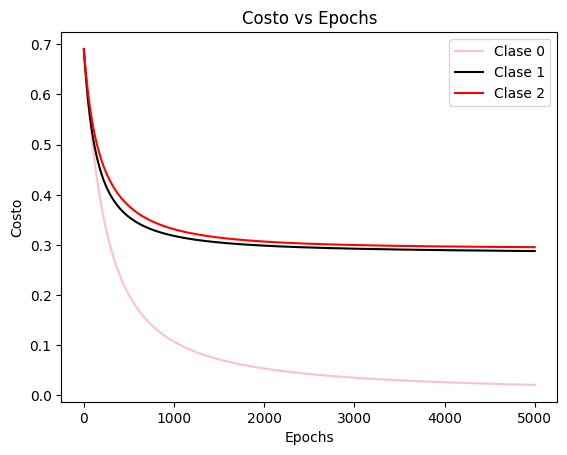

Precisión del modelo en el conjunto de prueba: 66.55%
Primeros 10 valores predichos (a qué clase pertenecen):
[1 1 2 1 1 2 1 1 1 1]
Primeros 10 valores reales (las etiquetas correctas):
[2. 1. 2. 1. 2. 2. 1. 1. 2. 1.]
Precisión del modelo en el conjunto de prueba: 66.55%


In [79]:

# Funciones auxiliares
# funcion de activacion
#convierte cualquier número en un valor entre 0 y 1, lo que se interpreta como una probabilidad.    
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#Esta función calcula el costo (o pérdida) del modelo dado un conjunto de parámetros theta, entradas X y etiquetas verdaderas y.
#(binary cross-entropy)
def compute_cost_with_regularization(X, y, theta, lambda_):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    epsilon = 1e-5  # Para evitar log(0)
    
    # Costo sin regularización (entropía cruzada binaria)
    cost = -(1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    
    # Regularización L2 (no regularizamos theta[0], el término de sesgo)
    reg_term = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
    
    # Costo total (costo sin regularización + término de regularización)
    cost_with_reg = cost + reg_term
    
    return cost_with_reg

#Implementa el algoritmo de descenso de gradiente. La idea es actualizar los parámetros theta iterativamente para minimizar la función de costo.
#para entrenar un modelo de regresión logística. Su objetivo es encontrar los parámetros theta que minimicen la función de costo 
#mientras se controla el sobreajuste, penalizando los valores grandes de los parámetros theta mediante la regularización.
def gradient_descent_with_regularization(X, y, theta, alpha, num_epochs, lambda_):
    m = len(y)
    cost_history = []
    
    for epoch in range(num_epochs):
        h = sigmoid(np.dot(X, theta))
        
        # Cálculo del gradiente con regularización
        gradient = np.dot(X.T, (h - y)) / m
        regularization_term = (lambda_ / m) * theta
        regularization_term[0] = 0  # No regularizamos theta[0] (término de sesgo)
        
        # Actualizamos theta con la regularización
        theta -= alpha * (gradient + regularization_term)
        
        # Cálculo del costo con regularización
        cost = compute_cost_with_regularization(X, y, theta, lambda_)
        cost_history.append(cost)
    
    return theta, cost_history

# resolver un problema de clasificación multiclase utilizando regresión logística.
def binari_with_regularization(X_train, y_train, num_classes, alpha=0.01, num_epochs=1000, lambda_=1.0):
    m, n = X_train.shape
    all_theta = np.zeros((num_classes, n))  # Guardar los theta de cada clase
    all_costs = []  # Guardar los costos para cada clase
    #aqui el modelo lo entrana por regresion logistica donde para la clase actual 
    # se crea un vector donde sus ejemplos son 1 y el resto 0, entrenamiento mediante gradiente descendente con regularización
    for i in range(num_classes):
        print(f"Entrenando clase {i + 1} de {num_classes}...")
        # Preparar el vector de salida para la clase actual
        y_class = np.where(y_train == i, 1, 0)

        # Inicializar los pesos theta para la clase
        theta = np.zeros(n)

        # Entrenar con gradient descent con regularización
        theta, cost_history = gradient_descent_with_regularization(X_train, y_class, theta, alpha, num_epochs, lambda_)

        # Guardar los theta y el costo
        all_theta[i, :] = theta
        all_costs.append(cost_history)
        #nos retorna los parametros de todas las tethas encontradas para esa clase y el costo
    return all_theta, all_costs

# Paso 5: Visualizar los costos por cada clase
def plot_cost_history(all_costs, num_epochs):
    colors = ['pink', 'black', 'red']
    for i, cost_history in enumerate(all_costs):
        # Usar los colores predefinidos: rosa, negro, rojo
        plt.plot(range(num_epochs), cost_history, label=f'Clase {i}', color=colors[i % len(colors)])

    plt.title('Costo vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Costo')
    plt.legend()
    plt.show()

# Entrenamiento y visualización
num_classes = len(np.unique(y_train))  # Número de clases
alpha = 0.01  # Tasa de aprendizaje
num_epochs = 5000  # Número de épocas
lambda_ = 1.0  # Parámetro de regularización

# Entrenar el modelo One-vs-All con regularización
all_theta, all_costs = binari_with_regularization(X_train, y_train, num_classes, alpha, num_epochs, lambda_)

# Visualizar el costo por epochs para cada clase
plot_cost_history(all_costs, num_epochs)

# Evaluar la precisión en el conjunto de prueba
def predict(X, all_theta):
    # Calcular la probabilidad para cada clase
    prob = sigmoid(np.dot(X, all_theta.T))
    #La función argmax selecciona el índice del valor máximo dentro de un vector
    #devuelve la clase que tiene mayor probabilidad
    return np.argmax(prob, axis=1)

y_pred = predict(X_test, all_theta)
accuracy = np.mean(y_pred == y_test) * 100
print(f"Precisión del modelo en el conjunto de prueba: {accuracy:.2f}%")

# Mostrar los primeros 10 valores predichos y los valores reales
print("Primeros 10 valores predichos (a qué clase pertenecen):")
print(y_pred[:10])

print("Primeros 10 valores reales (las etiquetas correctas):")
print(y_test[:10])
print(f"Precisión del modelo en el conjunto de prueba: {accuracy:.2f}%")

Dimensiones de all_theta: (3, 27)


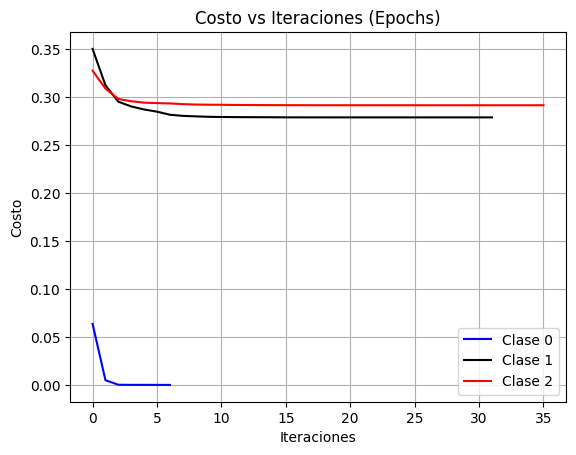

Precisión del conjunto de prueba: 66.18%
Dimensiones de XPrueba antes de agregar bias: (140, 26)
Dimensiones de XPrueba después de agregar bias: (140, 27)
Predicciones: [1 2 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 2 1 1 1 2 2 1 2 1 2 1 1
 2 1 1 1 1 1 2 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2 1 1 2 1 1
 2 2 2 1 2 2 1 2 1 2 1 2 2 1 2 1 1 2 2 1 1 1 1 2 2 1 1 1 1 2 2 2 2 1 1 1 1
 1 1 2 2 2 2 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 2]
Etiquetas reales: [2. 1. 1. 1. 1. 2. 2. 3. 2. 1. 1. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 2. 2. 2.
 2. 2. 1. 1. 1. 2. 1. 2. 1. 1. 3. 2. 1. 2. 1. 2. 3. 1. 2. 2. 1. 1. 1. 2.
 2. 2. 1. 2. 2. 2. 1. 3. 1. 2. 1. 1. 1. 1. 1. 1. 3. 2. 2. 2. 3. 2. 1. 2.
 1. 1. 2. 1. 2. 1. 2. 2. 1. 2. 1. 2. 1. 3. 2. 1. 2. 1. 2. 2. 2. 2. 1. 1.
 1. 2. 2. 1. 2. 2. 1. 2. 3. 2. 2. 1. 2. 1. 3. 1. 2. 1. 2. 2. 2. 1. 1. 1.
 2. 3. 2. 1. 1. 3. 1. 1. 2. 1. 2. 1. 2. 1. 1. 1. 2. 1. 2. 2.]


In [80]:

# Función sigmoide
# funcion de activacion
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# Función de coste y gradiente para la regresión logística regularizada
def lrCostFunction(theta, X, y, lambda_):
    m = y.size  # Número de ejemplos
    if y.dtype == bool:
        y = y.astype(int)

    # Calcular hipótesis
    h = sigmoid(X.dot(theta))

    # Regularización: no penalizar el término theta[0]
    temp = theta.copy()
    temp[0] = 0  # No penalizar theta[0]

    # Calcular el coste regularizado (Binary Cross-Entropy)
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    # Calcular el gradiente regularizado
    grad = (1 / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J, grad

# Función para entrenar el modelo One-vs-All y registrar el historial de costos
def oneVsAll(X, y, num_labels, lambda_):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))
    all_costs = []

    # Agregar una columna de unos a X (bias)
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        cost_history = []

        # Función para registrar el coste en cada iteración
        def callback(theta):
            cost, _ = lrCostFunction(theta, X, (y == c), lambda_)
            cost_history.append(cost)

        # Optimización de la función de coste
        res = optimize.minimize(fun=lrCostFunction,
                                x0=initial_theta,
                                args=(X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options,
                                callback=callback)

        all_theta[c] = res.x
        all_costs.append(cost_history)

    return all_theta, all_costs

# Predicción utilizando el modelo One-vs-All
def predictOneVsAll(all_theta, X):
    m = X.shape[0]
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis=1)
    return p

# Función para graficar el costo
def plot_cost_history(all_costs, num_epochs):
    colors = ['blue', 'black', 'red']  # Colores rosa, negro y rojo
    for i, cost_history in enumerate(all_costs):
        plt.plot(range(len(cost_history)), cost_history, label=f'Clase {i}', color=colors[i % len(colors)])
    plt.title('Costo vs Iteraciones (Epochs)')
    plt.xlabel('Iteraciones')
    plt.ylabel('Costo')
    plt.legend()
    plt.grid(True)
    plt.show()

# Parámetros
input_layer_size = 26
num_labels = 3
#determina la magnitud de la penalización aplicada a los pesos (theta) del modelo
lambda_ = 0.1

# Entrenamiento del modelo One-vs-All y almacenamiento del historial de costos
all_theta, all_costs = oneVsAll(X_train, y_train, num_labels, lambda_)
print("Dimensiones de all_theta:", all_theta.shape)

# Graficar el historial de costos
plot_cost_history(all_costs, num_epochs=50)

# Predicción en el conjunto de prueba
pred = predictOneVsAll(all_theta, X_test)
print('Precisión del conjunto de prueba: {:.2f}%'.format(np.mean(pred == y_test) * 100))

# Predicción para una parte de los datos de prueba
XPrueba = X_test[10:150, :].copy()
print("Dimensiones de XPrueba antes de agregar bias:", XPrueba.shape)

# Agregar columna de bias (unos) a XPrueba
XPrueba = np.concatenate([np.ones((XPrueba.shape[0], 1)), XPrueba], axis=1)
print("Dimensiones de XPrueba después de agregar bias:", XPrueba.shape)

# Predicción para los datos seleccionados
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis=1)
print("Predicciones:", p)

# Mostrar las etiquetas reales de y_test para comparación
print("Etiquetas reales:", y_test[10:150])